<a href="https://colab.research.google.com/github/partha1189/machine_learning/blob/tf_2.0_practice/Fashion_MNIST_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.3.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

module

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(X_train)

255

In [9]:
np.mean(X_train)

72.94035223214286

In [10]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

DATA EXPLORATION

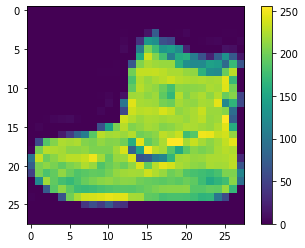

In [11]:
#%matplotlib inline
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [12]:
X_train = X_train/255.0
X_test =X_test/255.0

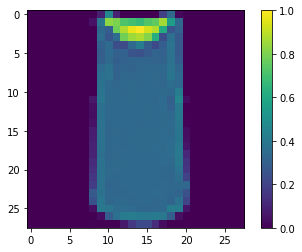

In [13]:
plt.figure()
plt.imshow(X_train[2])
plt.colorbar()

Build Model

In [14]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape = (28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')                             
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Compile Model

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5159 - accuracy: 0.8193 - val_loss: 0.4059 - val_accuracy: 0.8601
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3868 - accuracy: 0.8602 - val_loss: 0.3979 - val_accuracy: 0.8597
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3472 - accuracy: 0.8741 - val_loss: 0.3710 - val_accuracy: 0.8631
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3194 - accuracy: 0.8841 - val_loss: 0.3448 - val_accuracy: 0.8777
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3007 - accuracy: 0.8885 - val_loss: 0.3340 - val_accuracy: 0.8813
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2841 - accuracy: 0.8940 - val_loss: 0.3348 - val_accuracy: 0.8786
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2717 - accuracy: 0.8993 - val_loss: 0.3247 - val_accuracy:

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3596 - accuracy: 0.8702


In [19]:
test_acc

0.870199978351593

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [22]:
accuracy_score(y_test, y_pred)

0.8702

In [23]:
pred = model.predict(X_test)

In [24]:
pred

array([[3.52331117e-05, 8.66214600e-10, 7.12783276e-07, ...,
        3.14385369e-02, 2.48803372e-06, 9.50375617e-01],
       [8.53034580e-05, 4.58150080e-11, 9.90972042e-01, ...,
        6.52056085e-15, 2.29907400e-08, 2.89354088e-12],
       [6.43131237e-09, 1.00000000e+00, 8.26215385e-14, ...,
        7.62237670e-18, 3.60653452e-11, 1.60037297e-17],
       ...,
       [1.16685871e-04, 3.83177257e-12, 1.13994956e-05, ...,
        7.76026909e-10, 9.99766767e-01, 4.05288054e-13],
       [2.17061871e-08, 9.99992013e-01, 5.94783667e-11, ...,
        7.76668552e-13, 3.58399852e-08, 1.05038209e-11],
       [1.31753995e-05, 5.41530092e-08, 2.81472830e-06, ...,
        9.41645587e-04, 6.91238820e-05, 5.06275774e-06]], dtype=float32)

In [25]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [26]:
np.argmax(pred[1])

2

In [27]:
history.history

{'accuracy': [0.8193125128746033,
  0.8602291941642761,
  0.8741041421890259,
  0.8841458559036255,
  0.8884583115577698,
  0.8940416574478149,
  0.8992708325386047,
  0.9010833501815796,
  0.9067500233650208,
  0.9091041684150696],
 'loss': [0.5158698558807373,
  0.386783242225647,
  0.3471614718437195,
  0.3194025158882141,
  0.3006937503814697,
  0.2840767502784729,
  0.27169257402420044,
  0.2628490626811981,
  0.250406950712204,
  0.24214011430740356],
 'val_accuracy': [0.8600833415985107,
  0.859666645526886,
  0.8630833625793457,
  0.8777499794960022,
  0.8813333511352539,
  0.8785833120346069,
  0.8820833563804626,
  0.8868333101272583,
  0.8872500061988831,
  0.8805833458900452],
 'val_loss': [0.40588948130607605,
  0.3979038596153259,
  0.37101346254348755,
  0.34481707215309143,
  0.3339921236038208,
  0.3348044157028198,
  0.3246539831161499,
  0.32345202565193176,
  0.32379063963890076,
  0.3379190266132355]}

Plotting

In [28]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

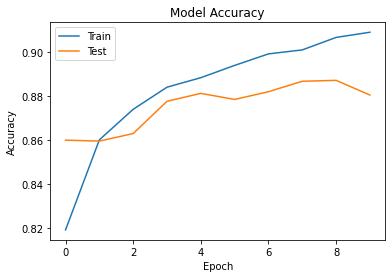

In [30]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Plot Confusion Matrix

pip install mlxtend

In [32]:
!pip install mlxtend

In [33]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fed85844128>)

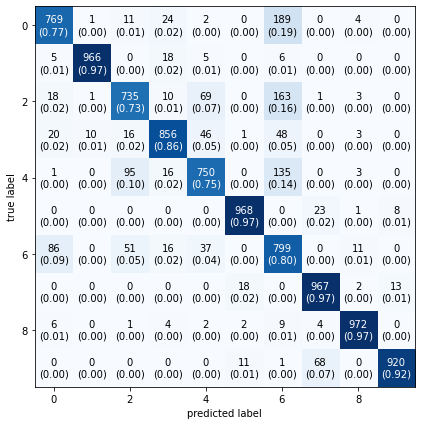

In [34]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(mat, figsize=(7,7), show_normed=True)